In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('../DATA/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [48]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [49]:
# effacer les cols inutils
# suicides/100k pop, country-year, HDI for year.

In [50]:
#df.drop(['country-year','HDI for year','suicides/100kpop','gdp_per_capita'], axis=1, inplace=True)
df = df.drop(df.columns[[6, 7, 8, 10, 11]], axis=1) 
df.head()

,country,year,sex,age,suicides_no,population,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900"
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900"
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900"
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900"
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900"


In [51]:
#df.drop('country-year', axis=1, inplace=True)
#df.head()

In [52]:
S=df.suicides_no
S.sum()

6748420

In [53]:
df.shape

(27820, 7)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 7 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
 gdp_for_year ($)     27820 non-null object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [55]:
df.age.describe()

count           27820
unique              6
top       25-34 years
freq             4642
Name: age, dtype: object

In [56]:
df.country.describe()

count           27820
unique            101
top       Netherlands
freq              382
Name: country, dtype: object

In [57]:
df.year.describe()

count    27820.000000
mean      2001.258375
std          8.469055
min       1985.000000
25%       1995.000000
50%       2002.000000
75%       2008.000000
max       2016.000000
Name: year, dtype: float64

In [58]:
age_coder ={'5-14 years':0,'15-24 years':1, '25-34 years':2, 
            '35-54 years':3, '55-74 years':4, '75+ years':5}

In [59]:
age_coder

{'5-14 years': 0,
 '15-24 years': 1,
 '25-34 years': 2,
 '35-54 years': 3,
 '55-74 years': 4,
 '75+ years': 5}

In [60]:
sex_coder={'female':0, 'male':1}

In [61]:
sex_coder

{'female': 0, 'male': 1}

In [62]:
df['age_encoder'] = df['age'].map(age_coder)
df.head()

,country,year,sex,age,suicides_no,population,gdp_for_year ($),age_encoder
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",1
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",3
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",1
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",5
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",2


In [63]:
df['sex_encoder'] = df['sex'].map(sex_coder)
df.head()

,country,year,sex,age,suicides_no,population,gdp_for_year ($),age_encoder,sex_encoder
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",1,1
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",3,1
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",1,0
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",5,1
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",2,1


In [64]:
df.suicides_no.fillna(0, inplace=True)
# il donne rien car je n'ai pas de valeur nul ds le suicide.
# si je mets False, il redonne les meme valeur

In [65]:
suicide = df.groupby('age_encoder')[['suicides_no']].sum()
suicide
#suicide.index.to_series().map(en)

,suicides_no
age_encoder,
0,52264
1,808542
2,1123912
3,2452141
4,1658443
5,653118


Text(-8.825000000000003, 0.5, 'Number of suicide')

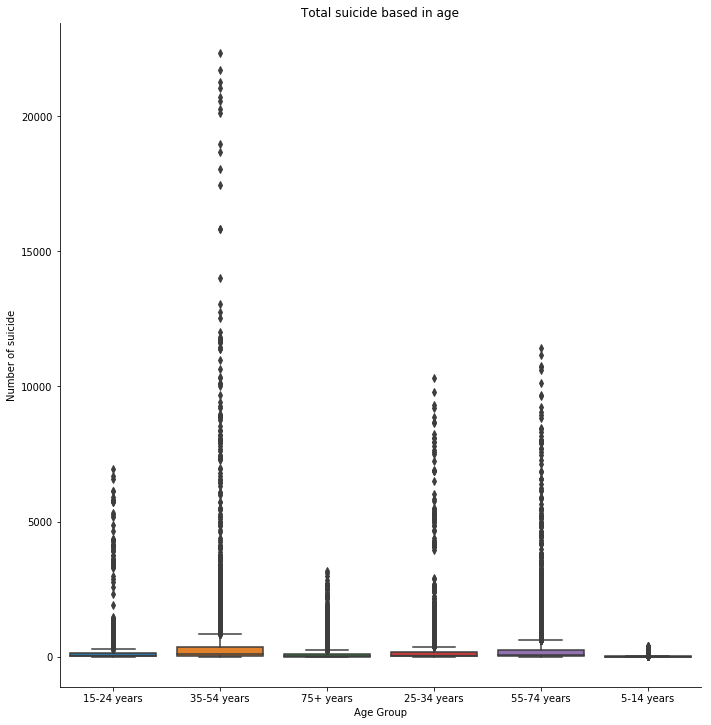

In [66]:
sns.catplot(x='age', y='suicides_no', data=df, kind='box', height=10)
plt.title('Total suicide based in age')
plt.xlabel('Age Group')
plt.ylabel('Number of suicide')

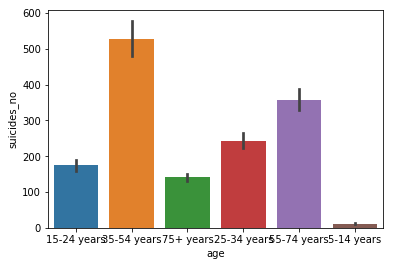

In [67]:
sns.barplot(x='age', y='suicides_no', data=df)

Text(0, 0.5, 'Number of suicide')

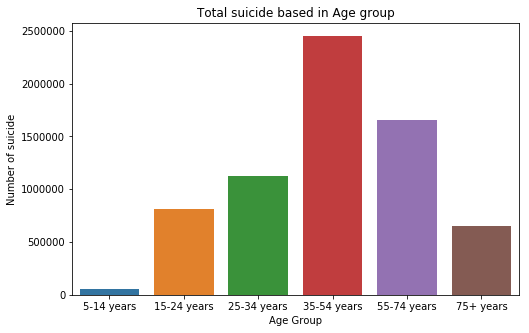

In [68]:
en ={0:'5-14 years',1:'15-24 years', 2:'25-34 years', 
            3:'35-54 years', 4:'55-74 years', 5:'75+ years'}
gen={0:'female', 1:'male'}

plt.figure(figsize=(8,5))
sns.barplot(x=suicide.index.map(en.get), y=suicide.suicides_no)
plt.title('Total suicide based in Age group')
plt.xlabel('Age Group')
plt.ylabel('Number of suicide')

In [69]:
# Total suicide male and female

In [70]:
male_suicide = df[df.sex_encoder==0]['suicides_no'].values.sum()
female_suicide = df[df.sex_encoder==1]['suicides_no'].values.sum()

In [71]:
#age_difference = pd.DataFrame(data=[male_suicide,female_suicide], 
                              #index=['male','female'])
#age_difference

In [72]:
tot_gen = pd.DataFrame([male_suicide,female_suicide], 
                              index=['male','female'])
tot_gen

,0
male,1559510
female,5188910


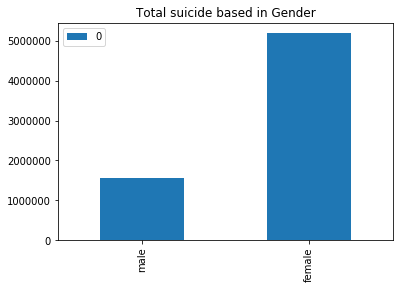

In [73]:
tot_gen.plot(kind='bar', title='Total suicide based in Gender')

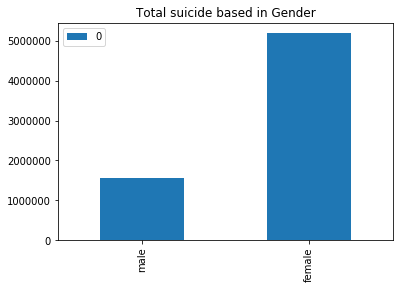

In [74]:
tot_gen.plot(kind='bar', title='Total suicide based in Gender')
plt.legend() #()met par defaut 0, ([]), je peut mettre des chiffres que je veux, en fonction des données

In [75]:
#Suicide of top most 10 country

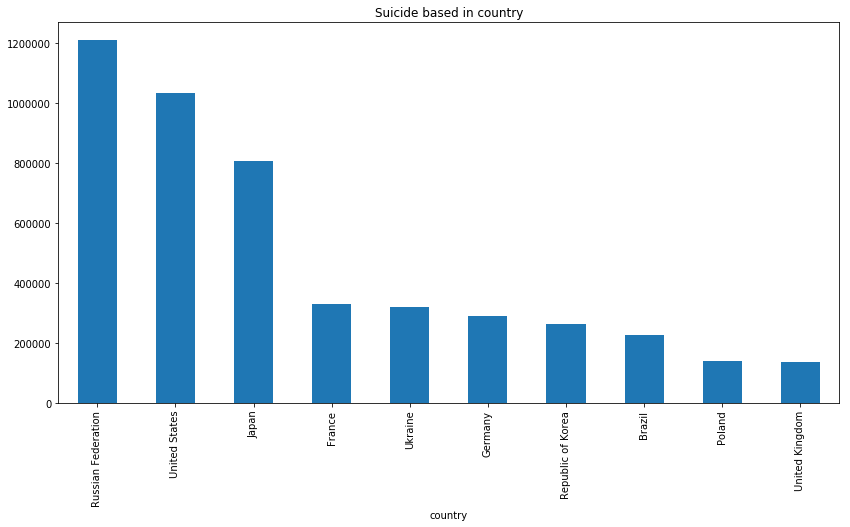

In [77]:
plt.figure(figsize=(13,5))
df.groupby('country').sum().sort_values('suicides_no',ascending=False)['suicides_no'][:10].plot(kind='bar',figsize=(14,7),title='Suicide based in country')

<Figure size 1152x360 with 0 Axes>

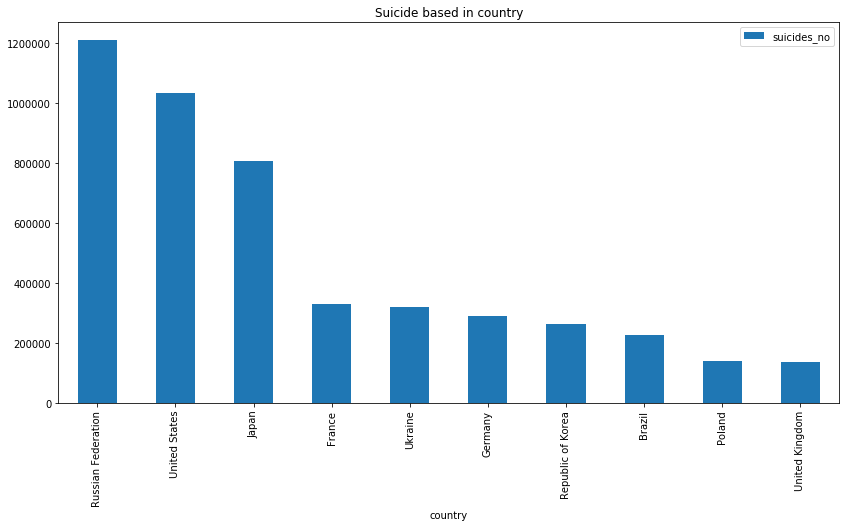

In [78]:
plt.figure(figsize=(16,5))
df.groupby('country').sum().sort_values(by='suicides_no', ascending=False)[['suicides_no']][:10].plot(kind='bar',figsize=(14,7),title='Suicide based in country')

In [79]:
df.groupby('country').sum().sort_values('suicides_no', ascending=False)['suicides_no'][:10]

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64

In [80]:
#Total Suicide on each year in descendin order

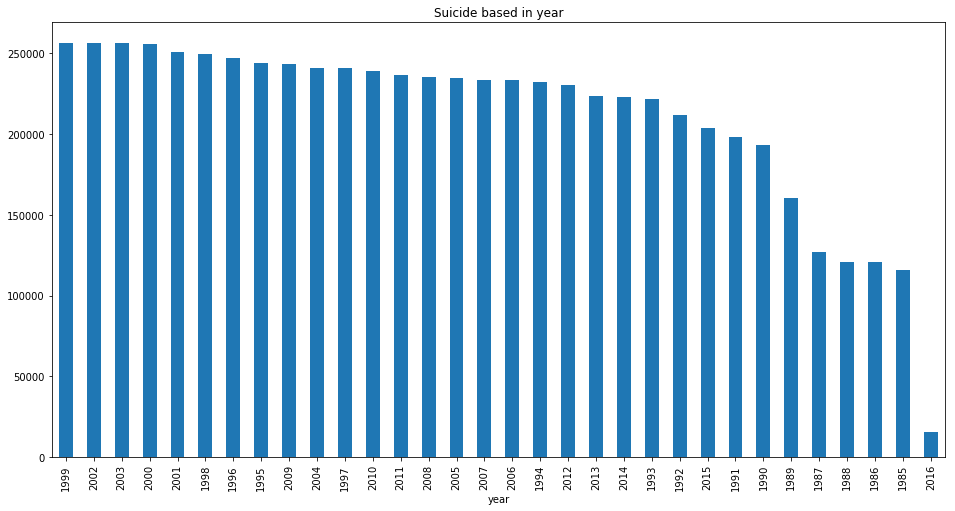

In [82]:
df.groupby('year').sum().sort_values('suicides_no',ascending=False)['suicides_no'].plot(kind='bar',figsize=(16,8),title='Suicide based in year')

In [83]:
suicide_data = df.groupby(['year','age']).sum()['suicides_no']
suicide_data.head()

year  age        
1985  15-24 years    17870
      25-34 years    20771
      35-54 years    35748
      5-14 years       984
      55-74 years    28736
Name: suicides_no, dtype: int64

In [84]:
suicide_data = df.groupby(['year','age']).sum()['suicides_no'].reset_index()
suicide_data.head()

,year,age,suicides_no
0,1985,15-24 years,17870
1,1985,25-34 years,20771
2,1985,35-54 years,35748
3,1985,5-14 years,984
4,1985,55-74 years,28736


In [85]:
#Suicide Based on Year And Age

Text(0, 0.5, 'Suicide number')

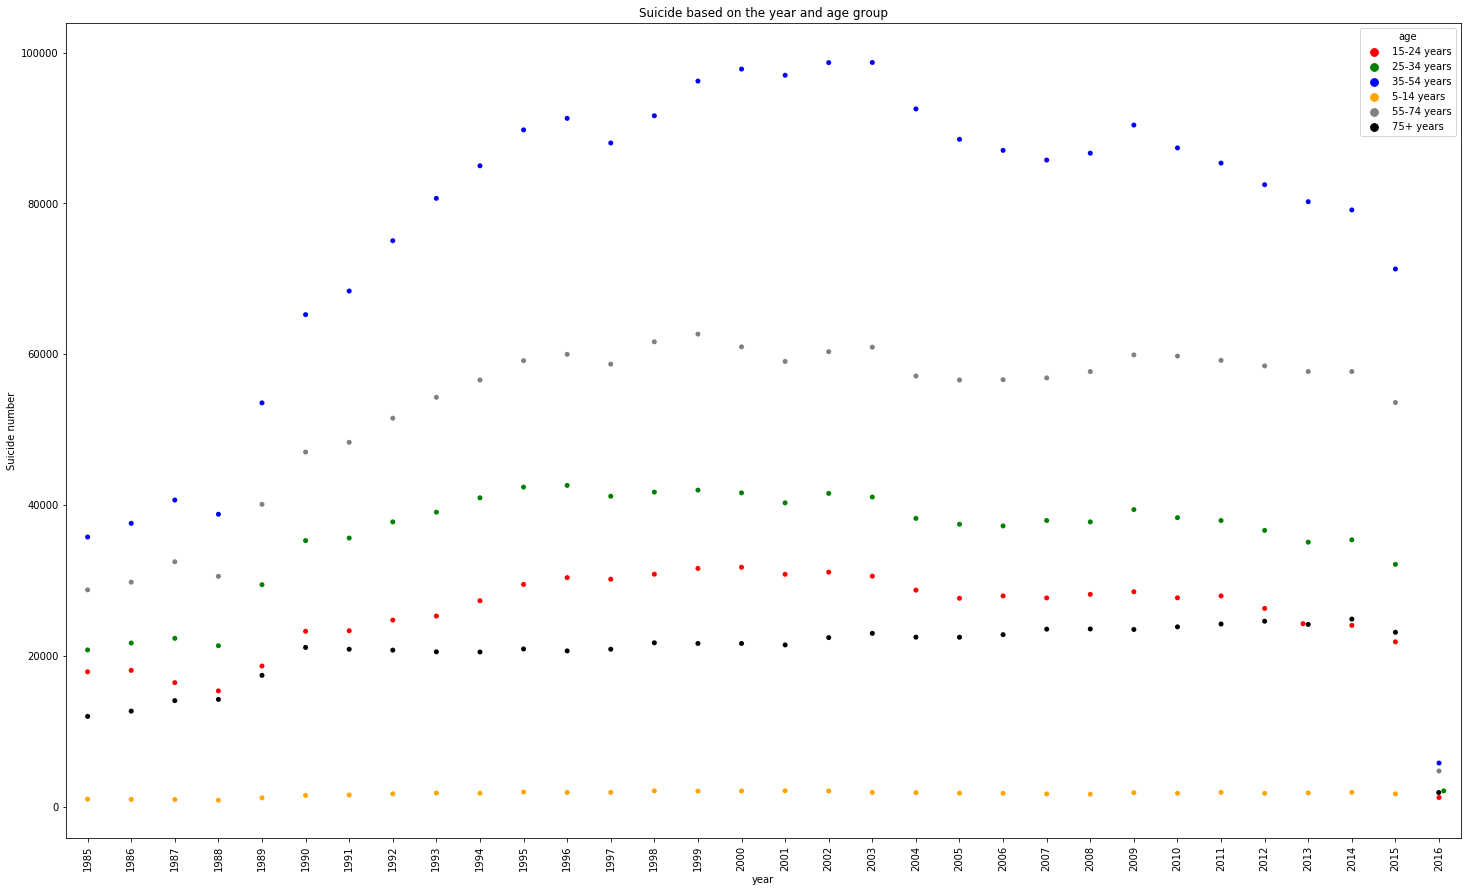

In [112]:
color = ['red','green','blue','orange','gray','black']
plt.figure(figsize=(25,15))
sns.swarmplot(x='year',y='suicides_no',hue='age',data=suicide_data,palette=color)
plt.title('Suicide based on the year and age group')
plt.xticks(rotation=90)
plt.ylabel('Suicide number')

In [ ]:
#Suicide Based on Country And Age

In [118]:
suicide_country_age = df.groupby(['country','age']).sum()['suicides_no'].reset_index()
suicide_country_age.head()

,country,age,suicides_no
0,Albania,15-24 years,546
1,Albania,25-34 years,427
2,Albania,35-54 years,591
3,Albania,5-14 years,61
4,Albania,55-74 years,264


Text(0.5, 1.0, 'Suicide based on the country and age')

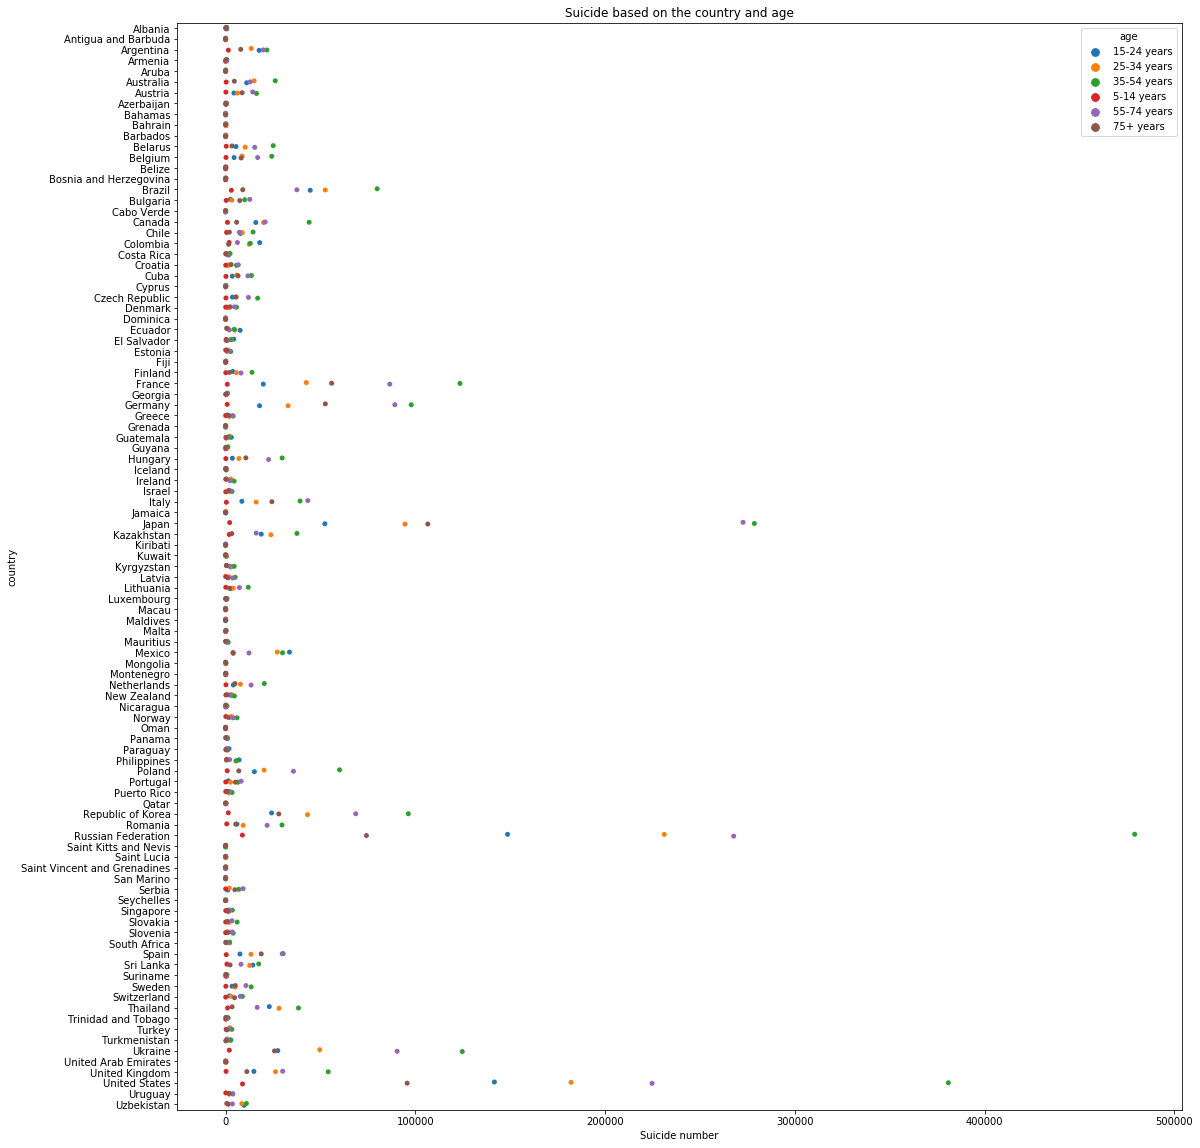

In [127]:
plt.figure(figsize=(18,20))
sns.stripplot(x='suicides_no',y='country',hue='age',data=suicide_country_age,jitter=True)
plt.ylabel('country')
plt.xlabel('Suicide number')
plt.title('Suicide based on the country and age')

Text(0.5, 1.0, 'Suicide based on the country and age')

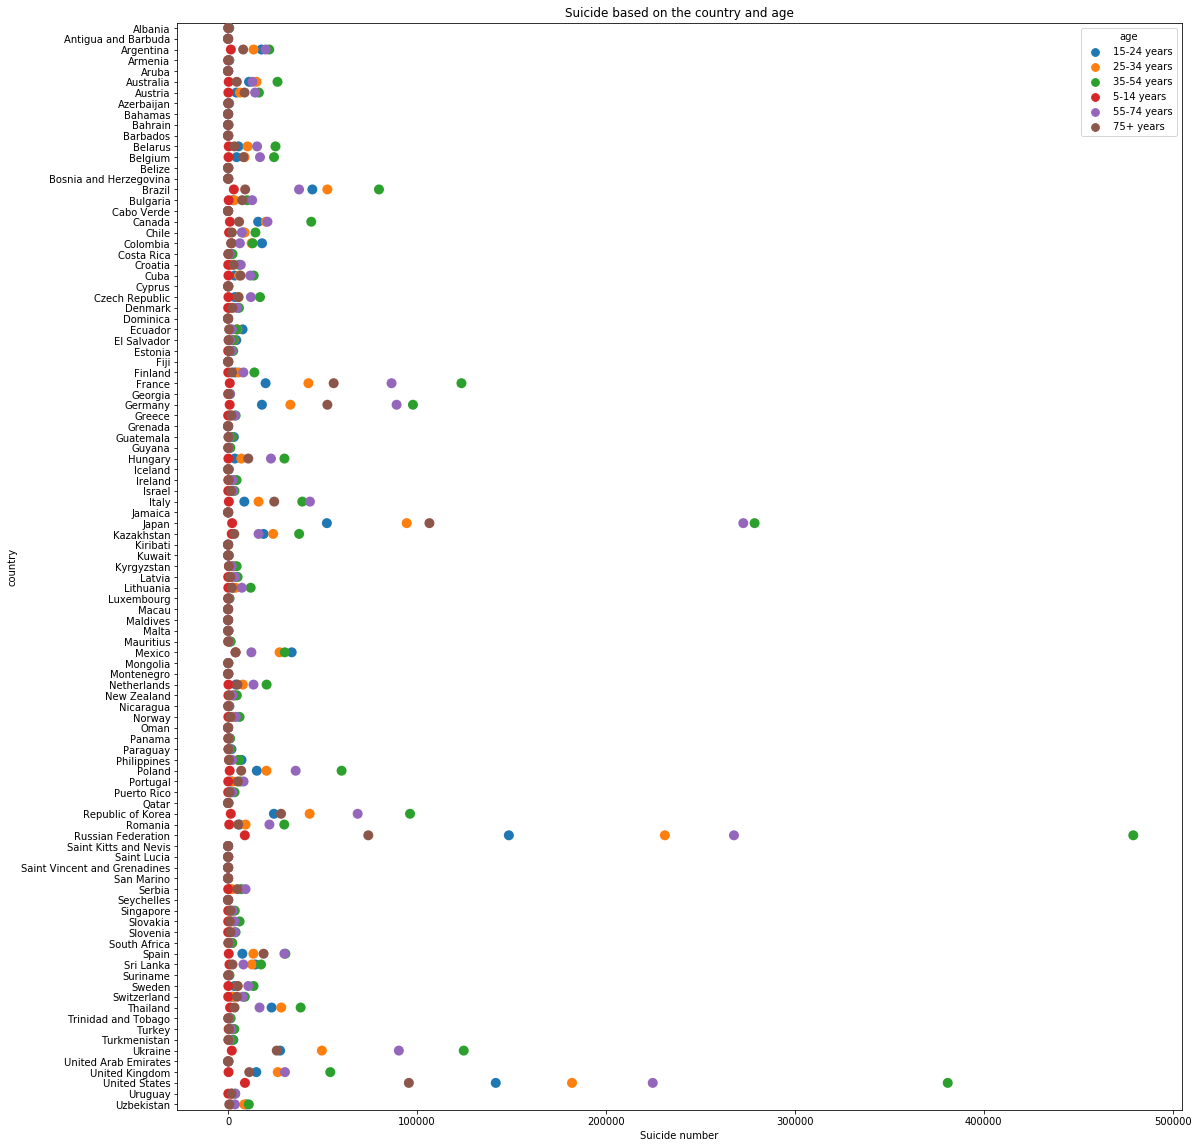

In [131]:
plt.figure(figsize=(18,20))
sns.stripplot(x='suicides_no',y='country',hue='age',data=suicide_country_age,jitter=False,size=10)
plt.ylabel('country')
plt.xlabel('Suicide number')
plt.title('Suicide based on the country and age')

In [121]:
suicide_country_age = df.groupby(['country','age']).sum()[['suicides_no','population']].reset_index()
suicide_country_age.head()

,country,age,suicides_no,population
0,Albania,15-24 years,546,12204973
1,Albania,25-34 years,427,10018581
2,Albania,35-54 years,591,15971048
3,Albania,5-14 years,61,14081268
4,Albania,55-74 years,264,8343071


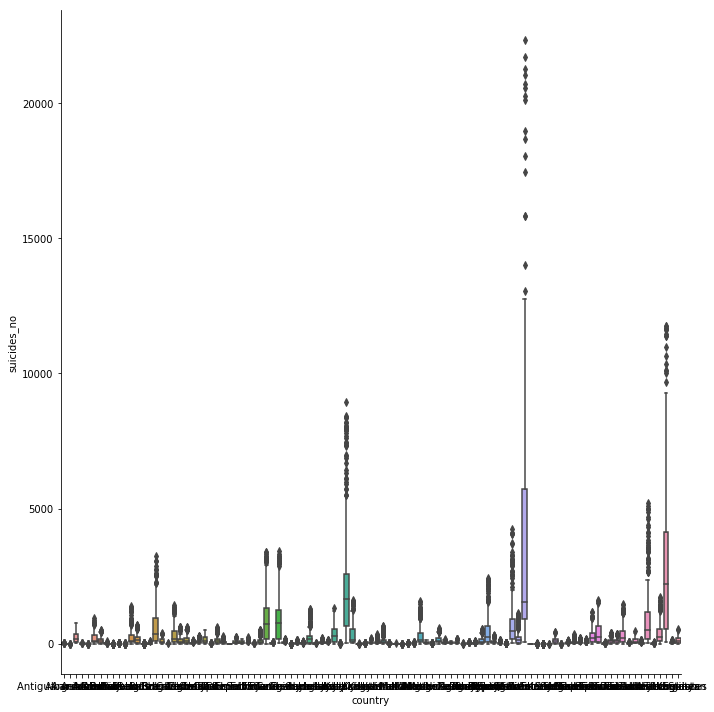

In [41]:
sns.catplot(x='country', y='suicides_no', data=df, kind='box', height=10)

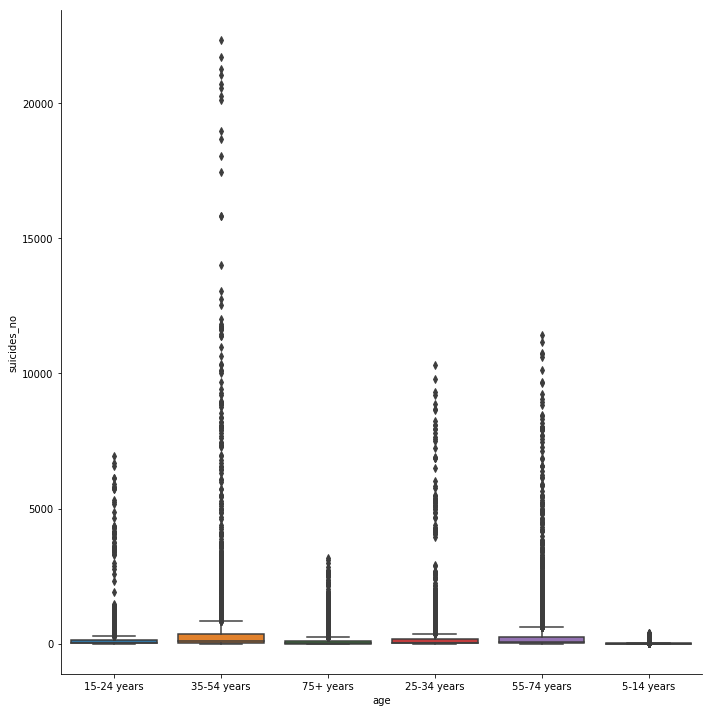

In [42]:
sns.catplot(x='age', y='suicides_no', kind='box', data=df, height=10)

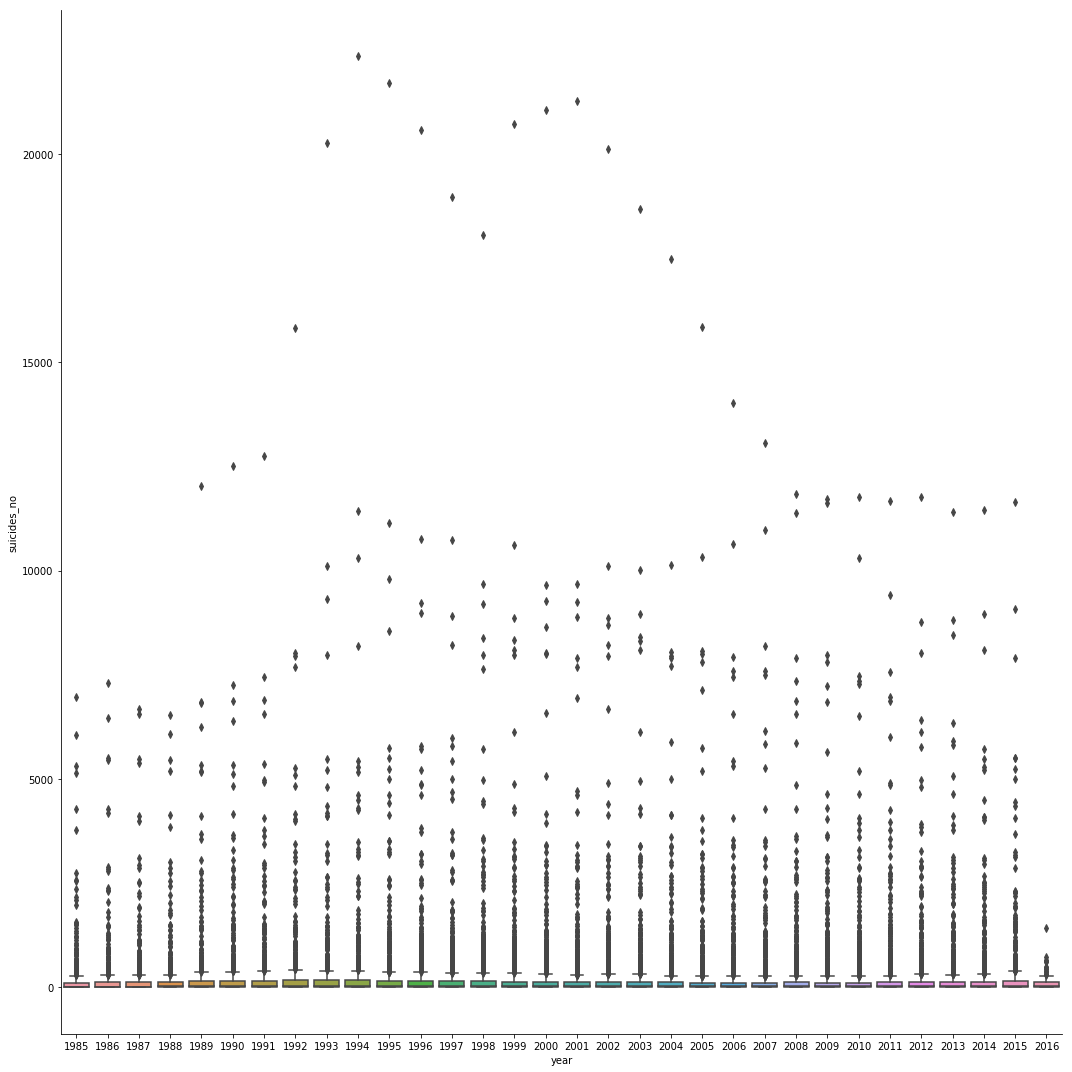

In [43]:
sns.catplot(x='year', y='suicides_no', data=df, kind='box', height=15)

In [13]:
df.suicides_no.apply(lambda x:x*2).head()

0    42
1    32
2    28
3     2
4    18
Name: suicides_no, dtype: int64

In [14]:
df['suicides_no']= df['suicides_no'].apply(lambda x:x*2)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years15-24 years,42,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years35-54 years,32,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years15-24 years,28,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years75+ years,2,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years25-34 years,18,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years75+ years,2,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years35-54 years,12,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years25-34 years,8,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years55-74 years,2,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [22]:
#df['Suicide']=df[['suicides_no','age']]??
df['suicides_no']= df[['suicides_no','age']].apply(lambda x:x*2)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years15-24 years,672,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years35-54 years,512,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years15-24 years,448,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years75+ years,32,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years25-34 years,288,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years75+ years,32,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years35-54 years,192,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years25-34 years,128,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years55-74 years,32,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
